## Overview


Say we have a collection of customers with a variety of characteristics such as age, location, and financial history, and we wish to discover patterns and sort them into clusters. Or perhaps we have a set of texts, such as wikipedia pages, and we wish to segment them into categories based on their content. This is the world of unsupervised learning, called as such because we are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data. Unsupervised learning encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization. We'll explore the fundamentals of unsupervised learning and implement the essential algorithms using scikit-learn and scipy. We will explore how to cluster, transform, visualize, and extract insights from unlabeled datasets, and end the session by building a recommender system to recommend popular musical artists.

# Libraries

In [114]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import (StandardScaler, 
                                   Normalizer, 
                                   normalize, 
                                   MaxAbsScaler)
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import (PCA, 
                                   TruncatedSVD, 
                                   NMF)
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import (linkage, 
                                     dendrogram, 
                                     fcluster)
from scipy.stats import pearsonr
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="invalid value encountered in sign")

# Clustering for dataset exploration


Exploring how to discover the underlying groups (or "clusters") in a dataset. We'll be clustering companies using their stock market prices, and distinguishing different species by clustering their measurements.

## Unsupervised Learning


> ### Unsupervised learning
- Unsupervised learning finds patterns in data 
- E.g. _clustering_ customers by their purchases 
- Compressing the data using purchase patterns _(dimension reduction)_


> ### Supervised vs unsupervised learning
- _Supervised_ learning finds patterns for a prediction task 
- E.g. classify tumors as benign or cancerous _(labels)_ 
- Unsupervised learning finds patterns in data 
  - ... but _without_ a specific prediction task in mind

> ### Iris dataset 
- Measurements of many iris plants {% fn 1%}
- 3 species of iris: setosa, versicolor, virginica 
- Petal length, petal width, sepal length, sepal width (the features of the dataset)


> ### Iris data is 4-dimensional
- Iris samples are points in 4 dimensional space 
- Dimension = number of features 
- Dimension too high to visualize! 
- ... but unsupervised learning gives insight


> ### k-means clustering
- Finds clusters of samples 
- Number of clusters must be specified 
- Implemented in sklearn ("scikit-learn")


> ### Cluster labels for new samples
- New samples can be assigned to existing clusters 
- k-means remembers the mean of each cluster (the "centroids") 
- Finds the nearest centroid to each new sample


> ### Scatter plots
- Scatter plot of sepal length vs petal length 
- Each point represents an iris sample 
- Color points by cluster labels 
- PyPlot (matplotlib.pyplot)
TODO: add scatter plot

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
samples = iris.data
samples[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### k-means clustering with scikit-learn

In [4]:
model = KMeans(n_clusters=3)
model.fit(samples)

KMeans(n_clusters=3)

In [5]:
labels = model.predict([[5.8, 4. , 1.2, 0.2]])
labels

array([1])

### Cluster labels for new samples

In [6]:
new_samples = [[ 5.7,4.4,1.5,0.4] ,[ 6.5,3. ,5.5,1.8] ,[ 5.8,2.7,5.1,1.9]]
model.predict(new_samples)

array([1, 2, 0])

### Scatter plots

In [7]:
labels_iris = model.predict(samples)

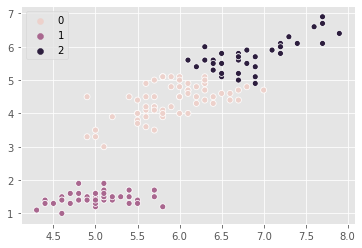

In [8]:
xs_iris = samples[:,0]
ys_iris = samples[:,2]
_ = sns.scatterplot(xs_iris, ys_iris, hue=labels_iris)
plt.show()

In [9]:
points = pd.read_csv("datasets/points.csv").values
points[:5]

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296]])

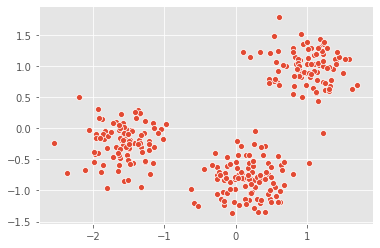

In [10]:
xs_points = points[:,0]
ys_points = points[:,1]
_ = sns.scatterplot(xs_points, ys_points)
plt.show()

There are three clusters

### Clustering 2D points

From the scatter plot we saw that the points seem to separate into 3 clusters. we'll now create a KMeans model to find 3 clusters, and fit it to the data points. After the model has been fit, we'll obtain the cluster labels for some new points using the `.predict()` method.

In [11]:
new_points = pd.read_csv("datasets/new_points.csv").values
new_points[:5]

array([[ 0.40023333, -1.26544471],
       [ 0.80323037,  1.28260167],
       [-1.39507552,  0.05572929],
       [-0.34119268, -1.07661994],
       [ 1.54781747,  1.40250049]])

In [12]:
# Create a KMeans instance with 3 clusters: model
model_points = KMeans(n_clusters=3)

# Fit model to points
model_points.fit(points)

# Determine the cluster labels of new_points: labels
labels_points = model_points.predict(new_points)

# Print cluster labels of new_points
print(labels_points)

[0 2 1 0 2 0 2 2 2 1 0 2 2 1 1 2 1 1 2 2 1 2 0 2 0 1 2 1 1 0 0 2 2 2 1 0 2
 2 0 2 1 0 0 1 0 2 1 1 2 2 2 2 1 1 0 0 1 1 1 0 0 2 2 2 0 2 1 2 0 1 0 0 0 2
 0 1 1 0 2 1 0 1 0 2 1 2 1 0 2 2 2 0 2 2 0 1 1 1 1 0 2 0 1 1 0 0 2 0 1 1 0
 1 1 1 2 2 2 2 1 1 2 0 2 1 2 0 1 2 1 1 2 1 2 1 0 2 0 0 2 1 0 2 0 0 1 2 2 0
 1 0 1 2 0 1 1 0 1 2 2 1 2 1 1 2 2 0 2 2 1 0 1 0 0 2 0 2 2 0 0 1 0 0 0 1 2
 2 0 1 0 1 1 2 2 2 0 2 2 2 1 1 0 2 0 0 0 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 1
 2 2 0 1 0 0 1 0 1 0 1 2 2 1 2 2 2 1 0 0 1 2 2 1 2 1 1 2 1 1 0 1 0 0 0 2 1
 1 1 0 2 0 1 0 1 1 2 0 0 0 1 2 2 2 0 2 1 1 2 0 0 1 0 0 1 0 2 0 1 1 1 1 2 1
 1 2 2 0]


We've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful. We'll inspect the clustering with a scatter plot!

### Inspect clustering


Let's now inspect the clustering we performed!

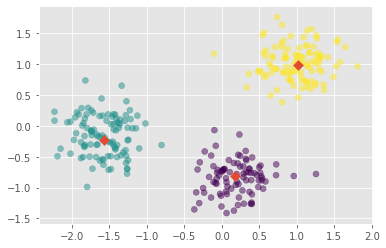

In [13]:
# Assign the columns of new_points: xs and ys
xs_np = new_points[:,0]
ys_np = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
_ = plt.scatter(xs_np, ys_np, c=labels_points, alpha=.5)

# Assign the cluster centers: centroids
centroids_p = model_points.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x_p = centroids_p[:,0]
centroids_y_p = centroids_p[:,1]

# Make a scatter plot of centroids_x and centroids_y
_ = plt.scatter(centroids_x_p, centroids_y_p, marker="D", s=50)
plt.show()


The clustering looks great! But how can we be sure that 3 clusters is the correct choice? In other words, how can we evaluate the quality of a clustering?

## Evaluating a clustering


- Can check correspondence with e.g. iris species 
- ... but what if there are no species to check against? 
- Measure quality of a clustering 
- Informs choice of how many clusters to look for


> ### Iris: clusters vs species
- k-means found 3 clusters amongst the iris samples 

> ### Cross tabulation with pandas
- Clusters vs species is a "cross-tabulation" 

In [14]:
iris_ct = pd.DataFrame({'labels':labels_iris, 'species':iris.target})
iris_ct.head()

,labels,species
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [15]:
np.unique(iris.target)

array([0, 1, 2])

In [16]:
iris_ct.species.unique()

array([0, 1, 2])

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
iris_ct['species'] = iris_ct.species.map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris_ct.head()

,labels,species
0,1,setosa
1,1,setosa
2,1,setosa
3,1,setosa
4,1,setosa


### Crosstab of labels and species

In [19]:
pd.crosstab(iris_ct.labels, iris_ct.species)

species,setosa,versicolor,virginica
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


### Measuring clustering quality

- Using only samples and their cluster labels 
- A good clustering has tight clusters 
- ... and samples in each cluster bunched together


> ### Inertia measures clustering quality
- Measures how spread out the clusters are (lower is better) 
- Distance from each sample to centroid of its cluster 
- After `fit()`, available as attribute `inertia_` 
- k-means attempts to minimize the inertia when choosing clusters

In [20]:
model.inertia_

78.851441426146

### The number of clusters
- Clusterings of the iris dataset with different numbers of clusters 
- More clusters means lower inertia 
- What is the best number of clusters?


### How many clusters to choose?

- A good clustering has tight clusters (so low inertia) 
- ... but not too many clusters! 
- Choose an "elbow" in the inertia plot 
- Where inertia begins to decrease more slowly 
- E.g. for iris dataset, 3 is a good choice


### How many clusters of grain?



In [21]:
samples_grain = pd.read_csv("datasets/samples_grain.csv").values
samples_grain[:5]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]])

an array `samples` contains the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

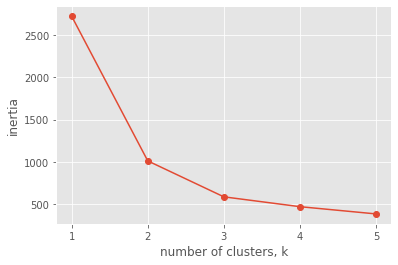

In [22]:
ks_grain = range(1, 6)
inertias_grain = []

for k in ks_grain:
    # Create a KMeans instance with k clusters: model
    model_grain = KMeans(n_clusters=k)
    
    # Fit model to samples
    model_grain.fit(samples_grain)
    
    # Append the inertia to the list of inertias
    inertias_grain.append(model_grain.inertia_)
    
# Plot ks vs inertias
plt.plot(ks_grain, inertias_grain, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks_grain)
plt.show()


The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

### Evaluating the grain clustering


In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". We will cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [23]:
varieties = pd.read_csv("datasets/varieties.csv")["0"].to_list()
varieties[:5]

['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat']

list `varieties` gives the grain variety for each sample.

In [24]:
# Create a KMeans model with 3 clusters: model
model_grain = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels_grain = model_grain.fit_predict(samples_grain)

# Create a DataFrame with labels and varieties as columns: df
grain_df = pd.DataFrame({'labels': labels_grain, 'varieties': varieties})

# Create crosstab: ct
ct_grain = pd.crosstab(grain_df.labels, grain_df.varieties)

# Display ct
ct_grain


varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,2,60,10
2,68,9,0


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything we can do in such situations to improve the clustering?

## Transforming features for better clusterings


> ### Piedmont wines dataset {% fn 2%}
- 178 samples from 3 distinct varieties of red wine: Barolo, Grignolino and Barbera
- Features measure chemical composition e.g. alcohol content 
- ... also visual properties like “color intensity”


> ### Feature variancesfeature
- The wine features have very different variances! 
- Variance of a feature measures spread of its values


> ### StandardScaler
- In kmeans: feature variance = feature influence 
- StandardScaler transforms each feature to have mean 0 and variance 1
- Features are said to be "standardized"


> ### Similar methods
- `StandardScaler` and `KMeans` have similar methods 
- Use `fit()` / `transform()` with `StandardScaler`
- Use `fit()` / `predict()` with `KMeans`


> ### `StandardScaler`, then `KMeans`
- Need to perform two steps: `StandardScaler`, then `KMeans`
- Use sklearn pipeline to combine multiple steps 
- Data flows from one step into the next


> ### sklearn preprocessing steps
- `StandardScaler` is a "preprocessing" step 
- `MaxAbsScaler` and `Normalizer` are other examples

### Scaling fish data for clustering




In [25]:
samples_fish = pd.read_csv("datasets/samples_fish.csv").values
samples_fish[:5]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1]])

an array `samples_fish` {% fn 3%} gives measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, we'll need to standardize these features first. We'll build a pipeline to standardize and cluster the data.

In [26]:
# Create scaler: scaler_fish
scaler_fish = StandardScaler()

# Create KMeans instance: kmeans_fish
kmeans_fish = KMeans(n_clusters=4)

# Create pipeline: pipeline_fish
pipeline_fish = make_pipeline(scaler_fish, kmeans_fish)


Now that We've built the pipeline, we'll use it to cluster the fish by their measurements.

### Clustering the fish data

In [27]:
species_fish = pd.read_csv("datasets/species_fish.csv")["0"].to_list()
species_fish[:5]

['Bream', 'Bream', 'Bream', 'Bream', 'Bream']

We'll now use the standardization and clustering pipeline to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

In [28]:
# Fit the pipeline to samples
pipeline_fish.fit(samples_fish)

# Calculate the cluster labels: labels_fish
labels_fish = pipeline_fish.predict(samples_fish)

# Create a DataFrame with labels and species as columns: df
fish_df = pd.DataFrame({'labels':labels_fish, 'species':species_fish})

# Create crosstab: ct
ct_fish = pd.crosstab(fish_df.labels, fish_df.species)

# Display ct
ct_fish


species,Bream,Pike,Roach,Smelt
labels,,,,
0,33,0,1,0
1,1,0,19,1
2,0,17,0,0
3,0,0,0,13


It looks like the fish data separates really well into 4 clusters!

### Clustering stocks using KMeans

We'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). 

In [29]:
movements = pd.read_csv("datasets/movements.csv").values
movements[:5]

array([[  0.58    ,  -0.220005,  -3.409998, ...,  -5.359962,   0.840019,
        -19.589981],
       [ -0.640002,  -0.65    ,  -0.210001, ...,  -0.040001,  -0.400002,
          0.66    ],
       [ -2.350006,   1.260009,  -2.350006, ...,   4.790009,  -1.760009,
          3.740021],
       [  0.109997,   0.      ,   0.260002, ...,   1.849999,   0.040001,
          0.540001],
       [  0.459999,   1.77    ,   1.549999, ...,   1.940002,   1.130005,
          0.309998]])

A NumPy array `movements` of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, we will include a `Normalizer` at the beginning of the pipeline. The `Normalizer` will separately transform each company's stock price to a relative scale before the clustering begins.


> Note: `Normalizer()` is different to `StandardScaler()`. While `StandardScaler()` standardizes features (such as the features of the fish data) by removing the mean and scaling to unit variance, `Normalizer()` **rescales** each sample - here, each company's stock price - independently of the other.

In [30]:
# Create a normalizer: normalizer_movements
normalizer_movements = Normalizer()

# Create a KMeans model with 10 clusters: kmeans_movements
kmeans_movements = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline_movements
pipeline_movements = make_pipeline(normalizer_movements, kmeans_movements)

# Fit pipeline to the daily price movements
pipeline_movements.fit(movements)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

Now that the pipeline has been set up, we can find out which stocks move together

### Which stocks move together?


So which company have stock prices that tend to change in the same way? We'll now inspect the cluster labels from the clustering to find out.

In [31]:
companies_movements=pd.read_csv("datasets/companies_movements.csv")
companies_movements.head()

,0
0,Apple
1,AIG
2,Amazon
3,American express
4,Boeing


In [32]:
companies_movements=companies_movements["0"].to_list()
companies_movements[:5]

['Apple', 'AIG', 'Amazon', 'American express', 'Boeing']

a list `companies_movements` of the company names

In [33]:
# Predict the cluster labels: labels_movements
labels_movements = pipeline_movements.predict(movements)

# Create a DataFrame aligning labels and companies: df
movements_df = pd.DataFrame({'labels': labels_movements, 'companies': companies_movements})

# Display df sorted by cluster label
movements_df.sort_values("labels")


,labels,companies
18,0,Goldman Sachs
26,0,JPMorgan Chase
16,0,General Electrics
15,0,Ford
5,0,Bank of America
55,0,Wells Fargo
3,0,American express
1,0,AIG
22,1,HP
20,1,Home Depot


# Visualization with hierarchical clustering and t-SNE

We'll Explore two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

## Visualizing hierarchies

> ### Visualisations communicate insight
- "t-SNE" : Creates a 2D map of a dataset (later) 
- "Hierarchical clustering"

> ### A hierarchy of groups
- Groups of living things can form a hierarchy 
- Clusters are contained in one another


> ### Eurovision scoring dataset {% fn 4 %}
- Countries gave scores to songs performed at the Eurovision 2016 
- 2D array of scores 
- Rows are countries, columns are songs


> ### Hierarchical clustering
- Every country begins in a separate cluster 
- At each step, the two closest clusters are merged
- Continue until all countries in a single cluster 
- This is “agglomerative” hierarchical clustering


> ### The dendrogram of a hierarchical clustering
- Read from the bottom up 
- Vertical lines represent clusters 


 With 5 data samples, there would be 4 merge operations, and with 6 data samples, there would be 5 merges, and so on.

### Hierarchical clustering of the grain data

the SciPy `linkage()` function performs hierarchical clustering on an array of samples. We will use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.

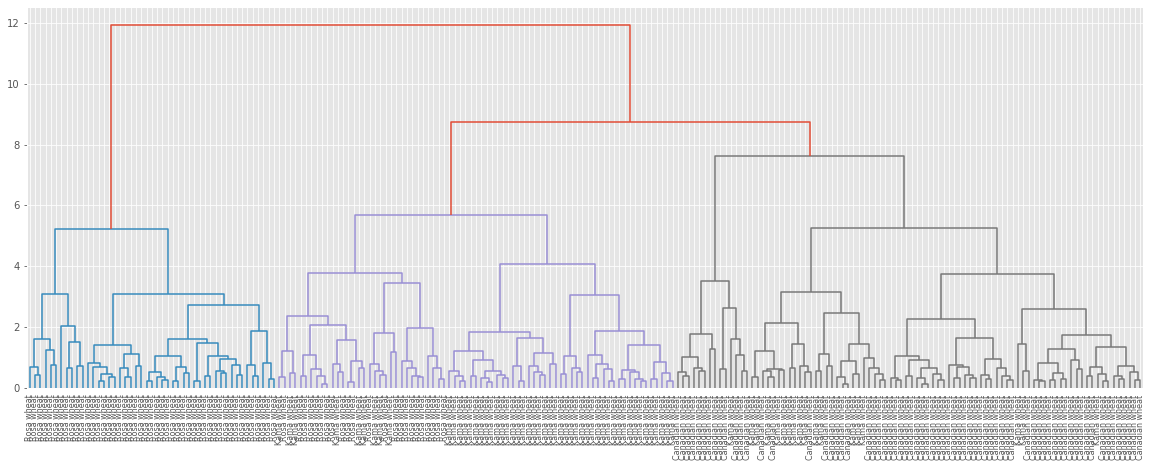

In [34]:
# Calculate the linkage: mergings_g
mergings_g = linkage(samples_grain, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20,7))
dendrogram(mergings_g,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=8,
)
plt.show()


Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

### Hierarchies of stocks

We used k-means clustering to cluster companies according to their stock price movements. Now, we'll perform hierarchical clustering of the companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so we'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

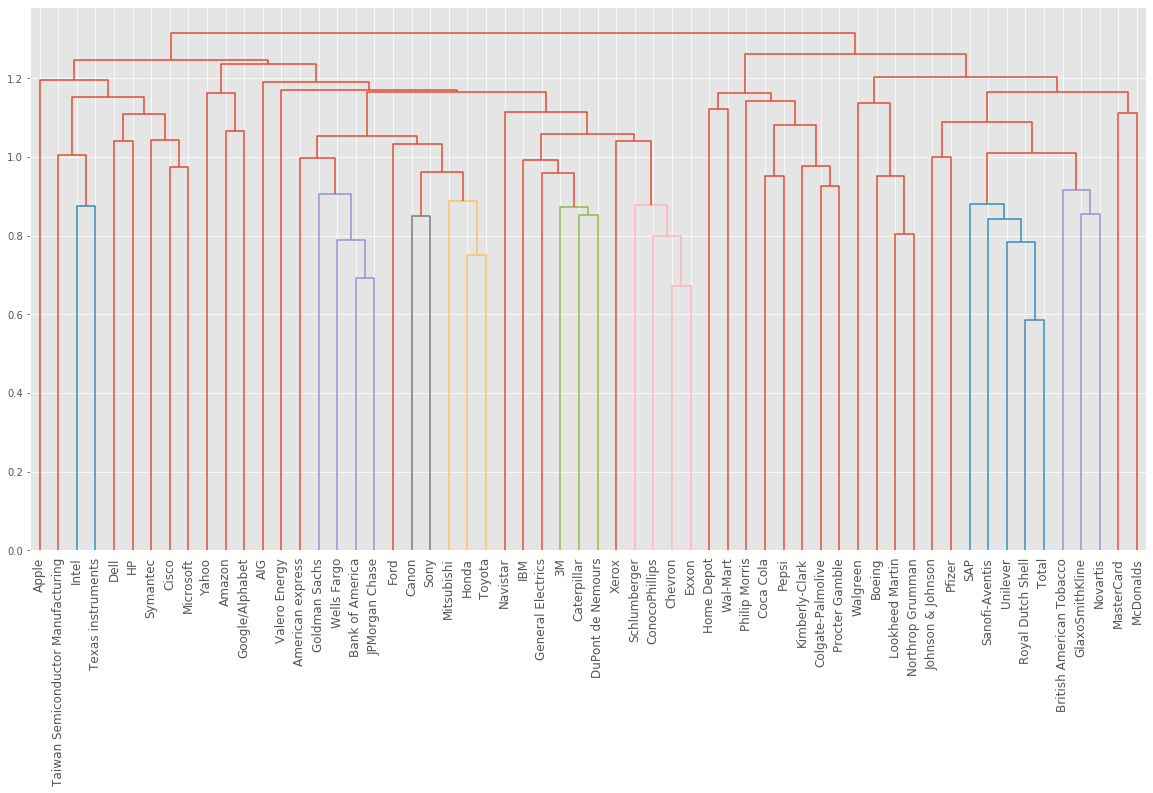

In [35]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings_m = linkage(normalized_movements, method="complete")

# Plot the dendrogram
plt.figure(figsize=(20,10))
dendrogram(mergings_m, labels=companies_movements, leaf_font_size=12, leaf_rotation=90)
plt.show()


You can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations. 

## Cluster labels in hierarchical clustering


> ### Cluster labels in hierarchical clustering
- Not only a visualisation tool! 
- Cluster labels at any intermediate stage can be recovered 
- For use in e.g. cross-tabulations


> ### Intermediate clusterings & height on dendrogram
- E.g. at height 15: Bulgaria, Cyprus, Greece are one cluster 
- Russia and Moldova are another 
- Armenia in a cluster on its own


> ### Dendrograms show cluster distances
- Height on dendrogram = distance between merging clusters 
- E.g. clusters with only Cyprus and Greece had distance approx. 6 
- This new cluster distance approx. 12 from cluster with only Bulgaria 


> ### Intermediate clusterings & height on dendrogram
- Height on dendrogram specifies max. distance between merging clusters 
- Don't merge clusters further apart than this (e.g. 15)


> ### Distance between clusters
- Defined by a "linkage method" 
- Specified via method parameter, e.g. linkage(samples, method="complete") 
- In "complete" linkage: distance between clusters is max. distance between their samples 
- Different linkage method, different hierarchical clustering!


> ### Extracting cluster labels
- Use the `fcluster` method 
- Returns a NumPy array of cluster labels


the linkage method defines how the distance between clusters is measured. In _complete_ linkage, the distance between clusters is the distance between the furthest points of the clusters. In _single_ linkage, the distance between clusters is the distance between the closest points of the clusters.

### Different linkage, different hierarchical clustering!


We will perform a hierarchical clustering of the voting countries with 'single' linkage. Different linkage, different hierarchical clustering!

In [36]:
samples_eurovision = pd.read_csv("datasets/samples_eurovision.csv").values
samples_eurovision[:5]

array([[ 2., 12.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0., 10.,  0.,  4.,  0.,  5.,  7.,  0.,  0.,  3.,  0.,  6.,  0.],
       [12.,  0.,  4.,  0.,  0.,  0.,  0.,  6.,  0.,  7.,  8.,  0.,  3.,
         0.,  0.,  0.,  0.,  5.,  1., 12.,  0.,  0.,  2.,  0., 10.,  0.],
       [ 0., 12.,  3.,  0., 12., 10.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  6.,  0.,  5.,  0.,  2.,  0.,  0.,  8.,  4.],
       [ 0.,  3., 12.,  0.,  0.,  5.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  4.,  0.,  7.,  6., 10.,  0.],
       [ 0.,  2.,  0., 12.,  0.,  8.,  0.,  0.,  0.,  4.,  1.,  0.,  7.,
         6.,  0.,  0.,  0.,  5.,  3., 12.,  0.,  0.,  0.,  0., 10.,  0.]])

In [37]:
country_names_eurovision = pd.read_csv("datasets/country_names_eurovision.csv")["0"].to_list()
country_names_eurovision[:5]

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan']

In [38]:
len(country_names_eurovision)

42

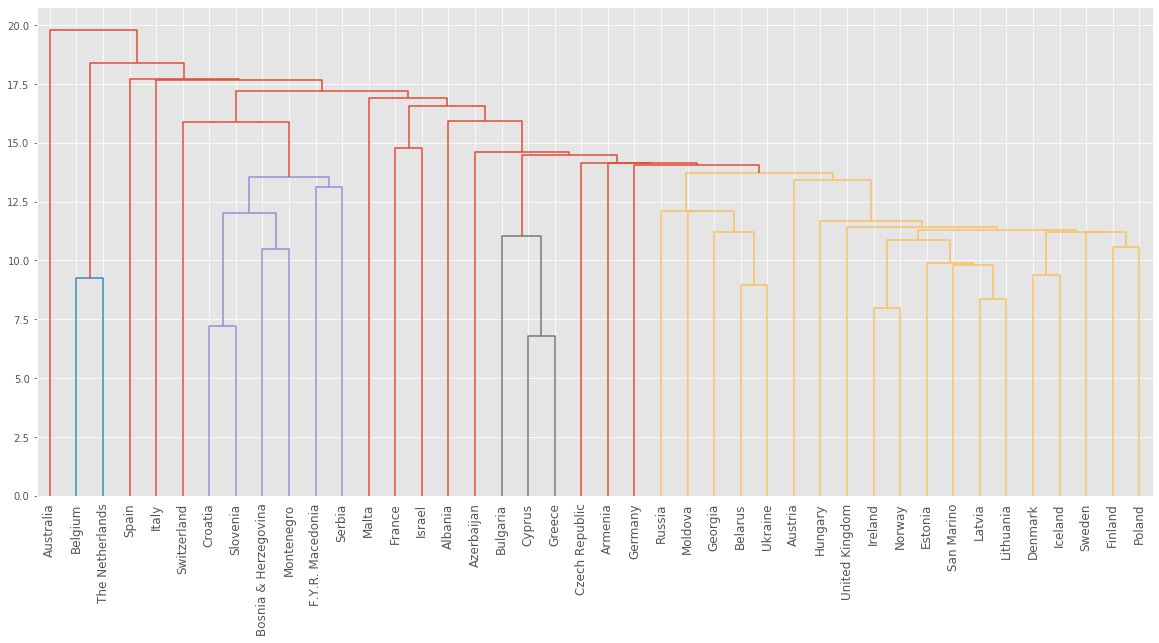

In [39]:
# Calculate the linkage: mergings
mergings_ev = linkage(samples_eurovision, method='single')

# Plot the dendrogram
plt.figure(figsize=(20,9))
dendrogram(mergings_ev, labels=country_names_eurovision, leaf_rotation=90, leaf_font_size=12)
plt.show()


### Extracting the cluster labels

We saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. We will use the `fcluster()` function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [40]:
# Use fcluster to extract labels: labels_g
labels_g = fcluster(mergings_g,6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
grain_df = pd.DataFrame({'labels': labels_g, 'varieties': varieties})

# Create crosstab: ct
grain_ct = pd.crosstab(grain_df.labels, grain_df.varieties)

# Display ct
print(grain_ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


We've now mastered the fundamentals of k-Means and agglomerative hierarchical clustering. Next, we'll explore t-SNE, which is a powerful tool for visualizing high dimensional data.

## t-SNE for 2-dimensional maps


> ### t-SNE for 2-dimensional maps
- t-SNE = “t-distributed stochastic neighbor embedding” 
- Maps samples to 2D space (or 3D) 
- Map approximately preserves nearness of samples 
- Great for inspecting datasets


> ### t-SNE on the iris dataset
- Iris dataset has 4 measurements, so samples are 4-dimensional 
- t-SNE maps samples to 2D space 
- t-SNE didn't know that there were different species 
- ... yet kept the species mostly separate

![image.png](datasets/iris_scatter.png)

> ### Interpreting t-SNE scatter plots
- “versicolor” and “virginica” harder to distinguish from one another 
- Consistent with k-means inertia plot: could argue for 2 clusters, or for 3

![image.png](datasets/iris_inertia_.png)


> ### t-SNE in sklearnIn
- 2D NumPy array samples
- List species giving species of labels as number (0, 1, or 2)


In [41]:
samples[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [42]:
iris.target[:5]

array([0, 0, 0, 0, 0])

> ### t-SNE in sklearn

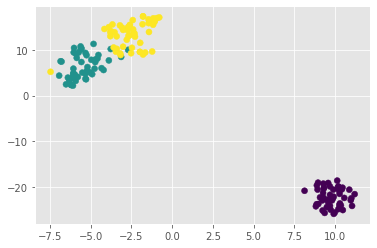

In [43]:
model_i = TSNE(learning_rate=100)
transformed_i = model_i.fit_transform(samples)
xs_i = transformed_i[:,0]
ys_i = transformed_i[:,1]
plt.scatter(xs_i, ys_i, c=iris.target)
plt.show()

> ### t-SNE has only `fit_transform()`
- Has a `fit_transform()` method
- Simultaneously fits the model and transforms the data 
- Has no separate `fit()` or `transform()` methods 
- Can’t extend the map to include new data samples 
- Must start over each time!

> ### t-SNE learning rate
- Choose learning rate for the dataset 
- Wrong choice: points bunch together
- Try values between 50 and 200

> ### Different every time
- t-SNE features are different every time 
- Piedmont wines, 3 runs, 3 different scatter plots! 
- ... however: The wine varieties (=colors) have same position relative to one another

![image.png](datasets/tsne_example.png)

### t-SNE visualization of grain dataset


We'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. 

In [44]:
variety_numbers_g = pd.read_csv("datasets/variety_numbers_grains.csv")["0"].to_list()
variety_numbers_g[:5]

[1, 1, 1, 1, 1]

In [45]:
samples_grain[:5]

array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
       [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
       [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]])

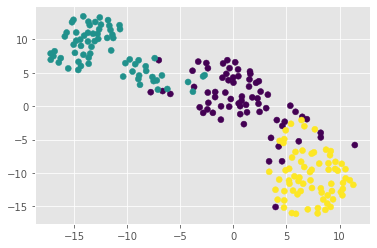

In [46]:
# Create a TSNE instance: model
model_g = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features_g = model_g.fit_transform(samples_grain)

# Select the 0th feature: xs
xs_g = tsne_features_g[:,0]

# Select the 1st feature: ys
ys_g = tsne_features_g[:,1]

# Scatter plot, coloring by variety_numbers_g
plt.scatter(xs_g, ys_g, c=variety_numbers_g)
plt.show()


the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data? 

###  t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. We'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives a map of the stock market! The stock price movements for each company are available as the array `normalized_movements`. The list `companies` gives the name of each company. 

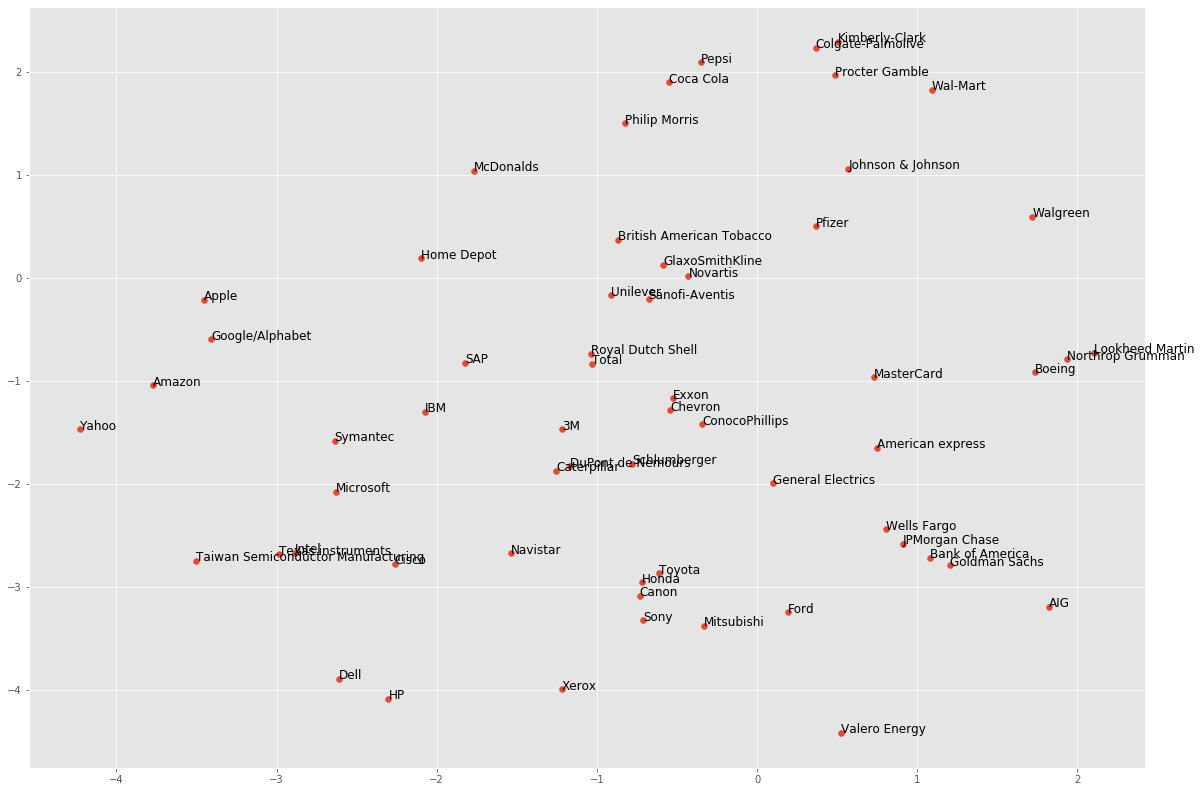

In [47]:
# Create a TSNE instance: model
model_m = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features_m = model_m.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs_m = tsne_features_m[:,0]

# Select the 1th feature: ys
ys_m = tsne_features_m[:,1]

# Scatter plot
plt.figure(figsize=(20,14))
plt.scatter(xs_m, ys_m)

# Annotate the points
for x, y, company in zip(xs_m, ys_m, companies_movements):
    plt.annotate(company, (x, y), fontsize=12)
plt.show()


It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.

# Decorrelating the data and dimension reduction


Dimension reduction summarizes a dataset using its common occuring patterns. We'll explore the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!

## Visualizing the PCA transformation


> ### Dimension reduction
- More efficient storage and computation 
- Remove less-informative "noise" features 
- ... which cause problems for prediction tasks, e.g. classification, regression


> ### Principal Component Analysis
- PCA = "Principal Component Analysis" 
- Fundamental dimension reduction technique 
- First step "decorrelation" (considered below) 
- Second step reduces dimension (considered later)

> ### PCA aligns data with axes
- Rotates data samples to be aligned with axes 
- Shifts data samples so they have mean 0 
- No information is lostPCA

![image.png](datasets/pca.png)


> ### PCA follows the fit/transform pattern
- `PCA` a scikit-learn component like `KMeans` or `StandardScaler`
- `fit()` learns the transformation from given data 
- `transform()` applies the learned transformation 
- `transform()` can also be applied to new data


In [48]:
wine = pd.read_csv("datasets/wine.csv")
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


> ### Using scikit-learn PCA
- `samples_wine` = array of two wine features (total_phenols & od280)

In [49]:
samples_wine = wine[['total_phenols', 'od280']].values
samples_wine[:5]

array([[2.8 , 3.92],
       [2.65, 3.4 ],
       [2.8 , 3.17],
       [3.85, 3.45],
       [2.8 , 2.93]])

In [50]:
model_w = PCA()
model_w.fit(samples_wine)

PCA()

In [51]:
transformed_w = model_w.transform(samples_wine)

> ### PCA features
- Rows of transformed correspond to samples 
- Columns of transformed are the "PCA features" 
- Row gives PCA feature values of corresponding sample


In [52]:
transformed_w[:5]

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]])

> ### PCA features are not correlated
- Features of dataset are often correlated, e.g. total_phenols and od280 
- PCA aligns the data with axes 
- Resulting PCA features are not linearly correlated ("decorrelation")PCA

![pca](datasets/pca.png)

> ### Pearson correlation
- Measures linear correlation of features 
- Value between -1 and 1 
- Value of 0 means no linear correlation

![image.png](datasets/pearson_scatter.png)

> ### Principal components
- "Principal components" = directions of variance 
- PCA aligns principal components with the axes 
- Available as `components_` attribute of PCA object 
- Each row defines displacement from mean

In [53]:
model_w.components_

array([[nan, nan],
       [nan, nan]])

### Correlated data in nature

We have array `grains` giving the width and length of samples of grain. We suspect that width and length will be correlated. To confirm this, let's make a scatter plot of width vs length and measure their Pearson correlation.

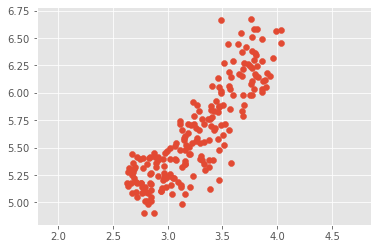

0.8604149377143469

In [54]:
# Assign the 0th column of grains: width
width_g = samples_grain[:,4]

# Assign the 1st column of grains: length
length_g = samples_grain[:,3]

# Scatter plot width vs length
plt.scatter(width_g, length_g)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation_g, pvalue_g = pearsonr(width_g, length_g)

# Display the correlation
correlation_g


As you would expect, the width and length of the grain samples are highly correlated.

### Decorrelating the grain measurements with PCA

We observed that the width and length measurements of the grain are correlated. Now, we'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

In [55]:
grains = pd.read_csv("datasets/grains.csv").values
grains[:5]

array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658]])

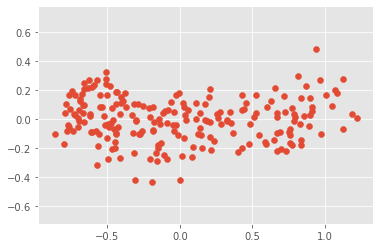

1.5634195327240974e-16

In [56]:
# Create PCA instance: model_g
model_g = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features_g = model_g.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs_g = pca_features_g[:,0]

# Assign 1st column of pca_features: ys
ys_g = pca_features_g[:,1]

# Scatter plot xs vs ys
plt.scatter(xs_g, ys_g)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation_g, pvalue_g = pearsonr(xs_g, ys_g)

# Display the correlation
correlation_g

principal components have to align with the axes of the point cloud.

## Intrinsic dimension

> ### Intrinsic dimension of a flight path
- 2 features: longitude and latitude at points along a flight path 
- Dataset appears to be 2-dimensional 
- But can approximate using one feature: displacement along flight path 
- Is intrinsically 1-dimensiona

![image.png](datasets/flight.png)

> ### Intrinsic dimension
- Intrinsic dimension = number of features needed to approximate the dataset 
- Essential idea behind dimension reduction 
- What is the most compact representation of the samples? 
- Can be detected with PCA


> ### Versicolor dataset
- "versicolor", one of the iris species 
- Only 3 features: sepal length, sepal width, and petal width
- Samples are points in 3D space


> ### Versicolor dataset has intrinsic dimension 2
- Samples lie close to a flat 2-dimensional sheet 
- So can be approximated using 2 features

![image.png](datasets/versicolor.png)


> ### PCA identifies intrinsic dimension
- Scatter plots work only if samples have 2 or 3 features 
- PCA identifies intrinsic dimension when samples have any number of features 
- Intrinsic dimension = number of PCA features with significant variance

> ### PCA of the versicolor samples

![image.png](datasets/pca_versicolor.png)

> ### PCA features are ordered by variance descending

![image.png](datasets/pca_variance.png)

> ### Variance and intrinsic dimension
- Intrinsic dimension is number of PCA features with significant variance 
- In our example: the first two PCA features 
- So intrinsic dimension is 2


In [57]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [58]:
versicolor = pd.DataFrame(iris.data, columns=iris.feature_names)
versicolor['target'] = iris.target
versicolor = versicolor[versicolor.target==1]
versicolor.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [59]:
samples_versicolor = versicolor[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']].values
samples_versicolor[:5]

array([[7. , 3.2, 1.4],
       [6.4, 3.2, 1.5],
       [6.9, 3.1, 1.5],
       [5.5, 2.3, 1.3],
       [6.5, 2.8, 1.5]])

> ### Plotting the variances of PCA features
- samples_versicolor = array of versicolor samples

In [60]:
pca_versicolor = PCA()
pca_versicolor.fit(samples_versicolor)

PCA()

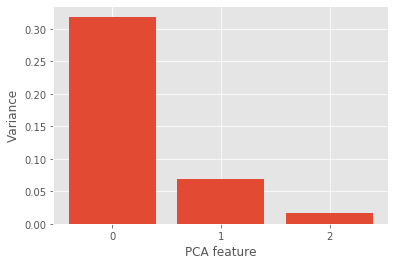

In [61]:
features_versicolor = range(pca_versicolor.n_components_)
plt.bar(features_versicolor, pca_versicolor.explained_variance_)
plt.xticks(features_versicolor)
plt.xlabel("PCA feature")
plt.ylabel("Variance")
plt.show()

> ### Intrinsic dimension can be ambiguous
- Intrinsic dimension is an idealization 
- ... there is not always one correct answer! 
- Piedmont wines: could argue for 2, or for 3, or more


### The first principal component

The first principal component of the data is the direction in which the data varies the most. We will use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

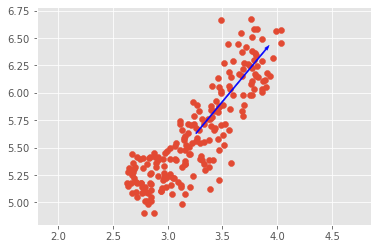

In [63]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Fit model to points
model_g.fit(grains)

# Get the mean of the grain samples: mean
mean_g = model_g.mean_

# Get the first principal component: first_pc
first_pc_g = model_g.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean_g[0], mean_g[1], first_pc_g[0], first_pc_g[1], color='blue', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

This is the direction in which the grain data varies the most.

### Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? We will make a plot of the variances of the PCA features to find out. We'll need to standardize the features first.

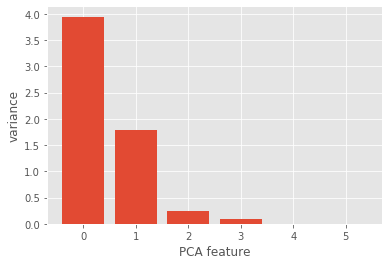

In [64]:
# Create scaler: scaler
scaler_fish = StandardScaler()

# Create a PCA instance: pca
pca_fish = PCA()

# Create pipeline: pipeline
pipeline_fish = make_pipeline(scaler_fish, pca_fish)

# Fit the pipeline to 'samples'
pipeline_fish.fit(samples_fish)

# Plot the explained variances
features_fish = range(pca_fish.n_components_)
plt.bar(features_fish, pca_fish.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features_fish)
plt.show()


It looks like PCA features 0 and 1 have significant variance. Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

## Dimension reduction with PCA


> ### Dimension reduction
- Represents same data, using less features
- Important part of machine-learning pipelines 
- Can be performed using PCA

> ### Dimension reduction with PCA
- PCA features are in decreasing order of variance 
- Assumes the low variance features are "noise" 
- ... and high variance features are informative

> ### Dimension reduction with PCA
- Specify how many features to keep 
- E.g. `PCA(n_components=2)` 
- Keeps the first 2 PCA features 
- Intrinsic dimension is a good choice


> ### Dimension reduction of iris dataset
- `samples` = array of iris measurements (4 features)
- `species` = list of iris species numbers


> ### Dimension reduction with PCA
- Discards low variance PCA features 
- Assumes the high variance features are informative 
- Assumption typically holds in practice (e.g. for iris)


> ### Word frequency arrays
- Rows represent documents, columns represent words 
- Entries measure presence of each word in each document 
- ... measure using "tf-idf" (more later)


> ### Sparse arrays and csr_matrix
- Array is "sparse": most entries are zero 
- Can use `scipy.sparse.csr_matrix` instead of NumPy array 
- `csr_matrix` remembers only the non-zero entries (saves space!)

> ### TruncatedSVD and csr_matrix
- scikit-learn PCA doesn't support `csr_matrix`
- Use scikit-learn `TruncatedSVD` instead
- Performs same transformation

### Dimension reduction of the fish measurements


We saw that `2` was a reasonable choice for the "intrinsic dimension" of the fish measurements. We will use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [67]:
scaled_samples_fish = pd.read_csv("datasets/scaled_samples_fish.csv").values
scaled_samples_fish[:5]

array([[-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 ,
         0.25373964],
       [-0.37434344, -0.29750241, -0.26893461, -0.14634781,  1.15869615,
         0.44376493],
       [-0.24230812, -0.30641281, -0.25242364, -0.15397009,  1.13926069,
         1.0613471 ],
       [-0.18157187, -0.09256329, -0.04603648,  0.02896467,  0.96434159,
         0.20623332],
       [-0.00464454, -0.0747425 , -0.04603648,  0.06707608,  0.8282934 ,
         1.0613471 ]])

In [68]:
# Create a PCA model with 2 components: pca
pca_fish = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca_fish.fit(scaled_samples_fish)

# Transform the scaled samples: pca_features
pca_features_fish = pca_fish.transform(scaled_samples_fish)

# Print the shape of pca_features
pca_features_fish.shape


(85, 2)

We've successfully reduced the dimensionality from 6 to 2.

### A tf-idf word-frequency array

We'll create a tf-idf word frequency array for a toy collection of documents. For this, we will use the `TfidfVectorizer` from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a `csr_matrix`. It has `fit()` and `transform()` methods like other sklearn objects.

In [69]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [71]:
# Create a TfidfVectorizer: tfidf
tfidf_d = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat_d = tfidf_d.fit_transform(documents)

# Print result of toarray() method
print(csr_mat_d.toarray())

# Get the words: words
words_d = tfidf_d.get_feature_names()

# Print words
words_d


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

### Clustering Wikipedia part I

`TruncatedSVD` is able to perform PCA on sparse arrays in `csr_matrix` format, such as word-frequency arrays. We will cluster some popular pages from Wikipedia {% fn 5%}. We will build the pipeline and apply it to the word-frequency array of some Wikipedia articles.

The Pipeline object will be consisting of a `TruncatedSVD` followed by `KMeans`.



In [72]:
# Create a TruncatedSVD instance: svd
svd_wp = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans_wp = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline_wp = make_pipeline(svd_wp, kmeans_wp)


Now that we have set up the pipeline, we will use to cluster the articles.

### Clustering Wikipedia part II

In [74]:
wv = pd.read_csv("datasets/Wikipedia_articles/wikipedia-vectors.csv", index_col=0)
articles = csr_matrix(wv.transpose())
articles_titles = list(wv.columns)

In [76]:
# Fit the pipeline to articles
pipeline_wp.fit(articles)

# Calculate the cluster labels: labels
labels_wp = pipeline_wp.predict(articles)

# Create a DataFrame aligning labels and titles: df
wp = pd.DataFrame({'label': labels_wp, 'article': articles_titles})

# Display df sorted by cluster label
wp.sort_values("label")


,label,article
47,0,Fever
40,0,Tonsillitis
41,0,Hepatitis B
42,0,Doxycycline
43,0,Leukemia
44,0,Gout
45,0,Hepatitis C
46,0,Prednisone
49,0,Lymphoma
48,0,Gabapentin


# Discovering interpretable features

We'll explore a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. We'll also explore how to use NMF to build recommender systems that can find us similar articles to read, or musical artists that match your listening history!

## Non-negative matrix factorization (NMF)


- NMF = "non-negative matrix factorization" 
- Dimension reduction technique 
- NMF models are interpretable (unlike PCA) 
- Easy to interpret means easy to explain! 
- However, all sample features must be non-negative (>= 0)

> ### Interpretable parts
- NMF expresses documents as combinations of topics (or "themes")
- NMF expresses images as combinations of patterns


> ### Using scikit-learn NMF
- Follows `fit()` / `transform()` pattern 
- Must specify number of components e.g. `NMF(n_components=2)`
- Works with NumPy arrays and with `csr_matrix`

> ### Example word-frequency array
- Word frequency array, 4 words, many documents 
- Measure presence of words in each document using "tf-idf" 
- "tf" = frequency of word in document 
- "idf" reduces influence of frequent words

> ### NMF components
- NMF has components
- ... just like PCA has principal components
- Dimension of components = dimension of samples
- Entries are non-negative

> ### NMF features
- NMF feature values are non-negative
- Can be used to reconstruct the samples
- ... combine feature values with components

> ### Sample reconstruction
- Multiply components by feature values, and add up 
- Can also be expressed as a product of matrices 
- This is the "Matrix Factorization" in "NMF"


> ### NMF fits to non-negative data, only
- Word frequencies in each document 
- Images encoded as arrays 
- Audio spectrograms 
- Purchase histories on e-commerce sites 
- ... and many more!


### Non-negative data

- A tf-idf word-frequency array.
- An array where rows are customers, columns are products and entries are 0 or 1, indicating whether a customer has purchased a product.

### NMF applied to Wikipedia articles



In [80]:
# Create an NMF instance: model
model_wp = NMF(n_components=6)

# Fit the model to articles
model_wp.fit(articles)

# Transform the articles: nmf_features
nmf_features_wp = model_wp.transform(articles)

# Print the NMF features
nmf_features_wp[:5]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.44041429],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.56653905],
       [0.00382072, 0.        , 0.        , 0.        , 0.        ,
        0.39860038],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3816956 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48546058]])

### NMF features of the Wikipedia articles

> Note: When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. We'll see why: NMF components represent topics (for instance, acting!).

In [82]:
# Create a pandas DataFrame: df
wp_df = pd.DataFrame(nmf_features_wp, index=articles_titles)

# Print the row for 'Anne Hathaway'
display(wp_df.loc[['Anne Hathaway']])

# Print the row for 'Denzel Washington'
display(wp_df.loc[['Denzel Washington']])


,0,1,2,3,4,5
Anne Hathaway,0.003846,0.0,0.0,0.575735,0.0,0.0


,0,1,2,3,4,5
Denzel Washington,0.0,0.005601,0.0,0.422398,0.0,0.0


## NMF learns interpretable parts


> ### Example: NMF learns interpretable parts
- Word-frequency array articles (tf-idf ) 
- 20,000 scientific articles (rows) 
- 800 words (columns)

In [83]:
articles.shape

(60, 13125)

NMF components are topics


> ### NMF components
- For documents: 
  - NMF components represent topics 
  - NMF features combine topics into documents 
- For images, NMF components are parts of images


> ### Grayscale images
- "Grayscale" image = no colors, only shades of gray 
- Measure pixel brightness 
- Represent with value between 0 and 1 (0 is black) 
- Convert to 2D array

> ### Encoding a collection of images
- Collection of images of the same size 
- Encode as 2D array 
- Each row corresponds to an image 
- Each column corresponds to a pixel 
- ... can apply NMF!

### NMF learns topics of documents

when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. We will using the NMF model that we built earlier using the Wikipedia articles. 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. We will identify the topic of the corresponding NMF component.

In [84]:
words = pd.read_csv("datasets/Wikipedia_articles/words.csv")["0"].to_list()
words[:5]

['aaron', 'abandon', 'abandoned', 'abandoning', 'abandonment']

In [85]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model_wp.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
component.nlargest()


(6, 13125)


film       0.627850
award      0.253121
starred    0.245274
role       0.211442
actress    0.186390
Name: 3, dtype: float64

### Explore the LED digits dataset

We'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, we'll explore the image dataset and see how it is encoded as an array. 

In [94]:
samples_images = pd.read_csv("datasets/samples_images.csv")
x=samples_images.isnull().sum()
x[x>0]

Series([], dtype: int64)

In [96]:
samples_images=samples_images.values
np.isinf(samples_images).any()

False

In [101]:
np.isnan(samples_images).any()

False

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


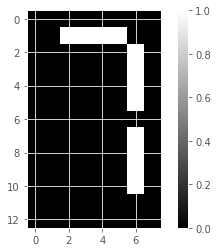

In [97]:
# Select the 0th row: digit
digit_i = samples_images[0,:]

# Print digit
print(digit_i)

# Reshape digit to a 13x8 array: bitmap
bitmap_i = digit_i.reshape(13,8)

# Print bitmap
print(bitmap_i)

# Use plt.imshow to display bitmap
plt.imshow(bitmap_i, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


### NMF learns the parts of images

In [98]:
def show_as_image(sample):
    """displays the image encoded by any 1D array"""
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

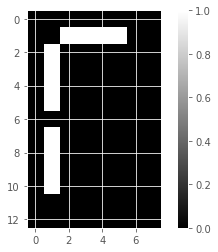

In [99]:
show_as_image(samples_images[99, :])

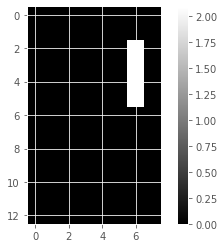

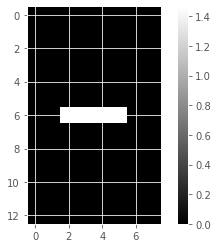

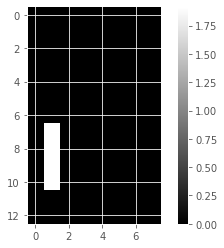

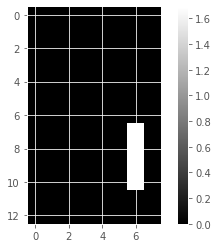

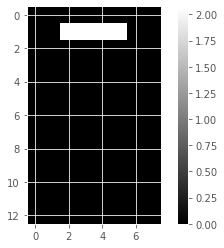

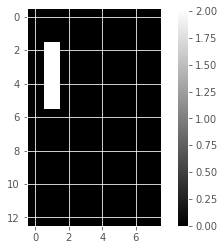

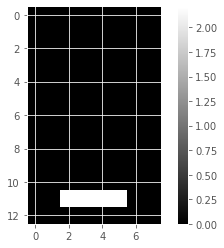

array([4.76823559e-01, 0.00000000e+00, 0.00000000e+00, 5.90605054e-01,
       4.81559442e-01, 0.00000000e+00, 7.37535093e-16])

In [104]:
# Create an NMF model: model
model_i = NMF(n_components=7)

# Apply fit_transform to samples: features
features_i = model_i.fit_transform(samples_images)

# Call show_as_image on each component
for component in model_i.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features_i = features_i[0,:]

# Print digit_features
digit_features_i

### PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. We will verify by inspecting the components of a PCA model fit to the dataset of LED digit images

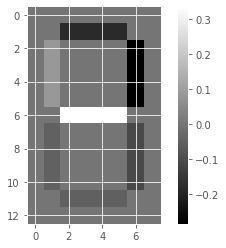

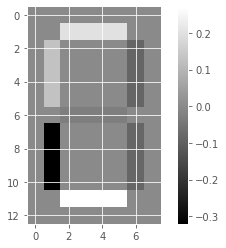

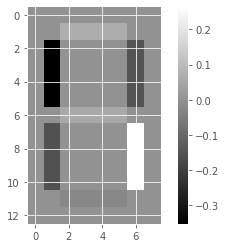

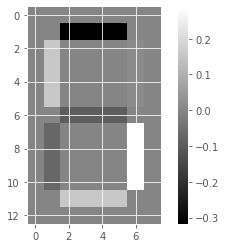

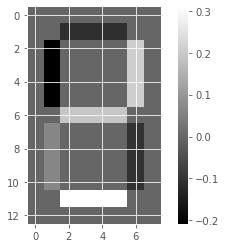

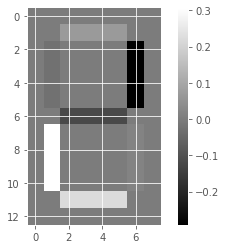

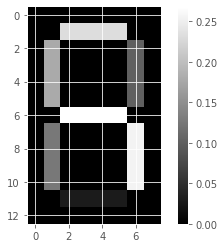

In [106]:
# Create a PCA instance: model
model_i = PCA(n_components=7)

# Apply fit_transform to samples: features
features_i = model_i.fit_transform(samples_images)

# Call show_as_image on each component
for component in model_i.components_:
    show_as_image(component)
    

the components of PCA do not represent meaningful parts of images of LED digits!

## Building recommender systems using NMF


> ### Finding similar articles
- Engineer at a large online newspaper 
- Task: recommend articles similar to article being read by customer 
- Similar articles should have similar topics


> ### Strategy
- Apply NMF to the word-frequency array
- NMF feature values describe the topics 
- ... so similar documents have similar NMF feature values 
- Compare NMF feature values?

> ### Versions of articles
- Different versions of the same document have same topic proportions
- ... exact feature values may be different! 
- E.g. because one version uses many meaningless words 
- But all versions lie on the same line through the origin

> ### Cosine similarity
- Uses the angle between the lines 
- Higher values means more similar 
- Maximum value is 1, when angle is 0

### Which articles are similar to 'Cristiano Ronaldo'?

finding the articles most similar to the article about the footballer Cristiano Ronaldo. 

In [110]:
# Normalize the NMF features: norm_features
norm_features_wp = normalize(nmf_features_wp)

# Create a DataFrame: df
wp_df = pd.DataFrame(norm_features_wp, index=articles_titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = wp_df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = wp_df.dot(article)

# Display those with the largest cosine similarity
similarities.nlargest()

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64

### Recommend musical artists part I

recommend popular music artists!

In [111]:
artists_df = pd.read_csv("datasets/Musical_artists/scrobbler-small-sample.csv")
artists = csr_matrix(artists_df)

In [115]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


### Recommend musical artists part II

Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? We will use the NMF features and the cosine similarity to find similar musical artists.

In [116]:
artist_names = pd.read_csv("datasets/Musical_artists/artists.csv")["0"].to_list()

In [118]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
similarities.nlargest()


ValueError: Shape of passed values is (2894, 20), indices imply (111, 20)

{{'Source: [http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)' | fndetail 1}}
{{'Source: [https://archive.ics.uci.edu/ml/datasets/Wine](https://archive.ics.uci.edu/ml/datasets/Wine)' | fndetail 2}}
{{'These fish measurement data were sourced from the [Journal of Statistics Education.](http://ww2.amstat.org/publications/jse/jse_data_archive.htm)' | fndetail 3}}
{{'Source: [http://www.eurovision.tv/page/results](http://www.eurovision.tv/page/results)' | fndetail 4}}
{{'The Wikipedia dataset you will be working with was obtained from [here](https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/).' | fndetail 5}}